In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Import and partition data
---



https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
cifar = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

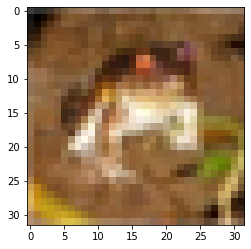

In [ ]:
plt.imshow(x_train[0,:,:,:])

In [ ]:
x_train[0,:,:,2]

array([[ 63,  45,  43, ..., 108, 102, 103],
       [ 20,   0,   0, ...,  55,  50,  57],
       [ 21,   0,   8, ...,  50,  50,  42],
       ...,
       [ 96,  34,  26, ...,  70,   7,  20],
       [ 96,  42,  30, ...,  94,  34,  34],
       [116,  94,  87, ..., 140,  84,  72]], dtype=uint8)

In [ ]:
x_train[0,1].shape

(32, 3)

Data pre-processing
---



Data scaling

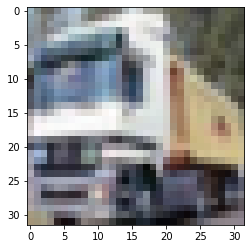

In [ ]:
x_train = x_train/255
x_test = x_test/255
plt.imshow(x_train[1])

DL model
---



Data augmentaion

In [ ]:
from keras import layers
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [ ]:
from keras.regularizers import l2

# without data augmentation
model = keras.Sequential([

    keras.layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(32,32,3)),
    keras.layers.AveragePooling2D(pool_size=2,strides=1),

    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.AveragePooling2D((2,2)),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.AveragePooling2D((2,2)),

    keras.layers.Conv2D(256, (3,3), activation='relu'),
    keras.layers.AveragePooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu', kernel_regularizer=l2(0.1)),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.1)),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(10, activation = 'softmax')

])

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 average_pooling2d_75 (Avera  (None, 31, 31, 32)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_81 (Conv2D)          (None, 31, 31, 64)        18496     
                                                                 
 average_pooling2d_76 (Avera  (None, 15, 15, 64)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_82 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 average_pooling2d_77 (Avera  (None, 6, 6, 128)      

In [ ]:
loss = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.Adam()
metrics = ['accuracy']

model.compile(optimizer, loss, metrics)

Training
---



In [ ]:
batch_size = 32
epochs = 50

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=(x_test, y_test),
                    validation_batch_size = batch_size)

Epoch 1/50
1563/1563 [==============================] - 12s 7ms/step - loss: 3.8769 - accuracy: 0.1741 - val_loss: 1.9584 - val_accuracy: 0.2408
Epoch 2/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.9387 - accuracy: 0.2724 - val_loss: 1.8143 - val_accuracy: 0.3315
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8424 - accuracy: 0.3404 - val_loss: 1.7052 - val_accuracy: 0.3785
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7490 - accuracy: 0.3898 - val_loss: 1.6005 - val_accuracy: 0.4466
Epoch 5/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6615 - accuracy: 0.4295 - val_loss: 1.5069 - val_accuracy: 0.4607
Epoch 6/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5931 - accuracy: 0.4556 - val_loss: 1.4552 - val_accuracy: 0.4979
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5520 - accuracy: 0.4761 - val_loss: 1.4612 - val_ac

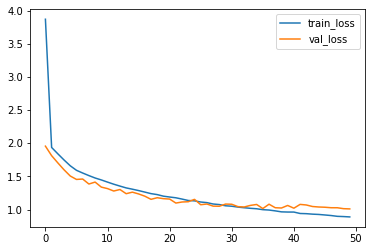

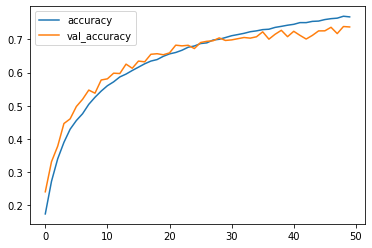

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.legend()
plt.figure()
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val_accuracy')
plt.legend()


Save model
---



In [ ]:
#model.save('model_1.h5')

In [ ]:
from keras.models import load_model
model2 = load_model('model_1.h5')

OSError: ignored